In [1]:
import pandas as pd
import nltk
import string
import re
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt

In [3]:
# Read the data
df= pd.read_csv('daraz-product-reviews.csv')

In [4]:
# Check the data
df.head()

,Sentiments,Reviews
0,negative,Stuff and design was totally changed. cheap qu...
1,positive,"i got my parxel before time,sorry for late rev..."
2,positive,So far so good..... Bought it only because it ...
3,positive,Received on time and in a safely packed box. T...
4,positive,satisfied 🤩


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14529 entries, 0 to 14528
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentiments  14529 non-null  object
 1   Reviews     14529 non-null  object
dtypes: object(2)
memory usage: 227.1+ KB


In [6]:
# Check the missing values
df.isnull().sum()

Sentiments    0
Reviews       0
dtype: int64

Data Preprocessing

In [7]:
#remove punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
# Remove special characters, numbers and punctuation
def remove_special_characters_numbers(text): 
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

In [9]:
df['Reviews'] = df['Reviews'].apply(remove_special_characters_numbers)

In [10]:
df.head()

,Sentiments,Reviews
0,negative,Stuff and design was totally changed cheap qua...
1,positive,i got my parxel before timesorry for late revi...
2,positive,So far so good Bought it only because it has t...
3,positive,Received on time and in a safely packed box Th...
4,positive,satisfied


CONVERTING TO LOWERCASE

In [11]:
df['Reviews'] = df['Reviews'].str.lower()

In [12]:
df.head()

,Sentiments,Reviews
0,negative,stuff and design was totally changed cheap qua...
1,positive,i got my parxel before timesorry for late revi...
2,positive,so far so good bought it only because it has t...
3,positive,received on time and in a safely packed box th...
4,positive,satisfied


REMOVING WHITESPACES

In [13]:
def remove_extra_whitespace(text):
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)    # Remove extra spaces
    return text

In [14]:
df['Reviews'] = df['Reviews'].apply(remove_extra_whitespace)

In [15]:
df.head()

,Sentiments,Reviews
0,negative,stuff and design was totally changed cheap qua...
1,positive,i got my parxel before timesorry for late revi...
2,positive,so far so good bought it only because it has t...
3,positive,received on time and in a safely packed box th...
4,positive,satisfied


TOKENIZATION

In [16]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\smari\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [17]:
df['Reviews'] = df['Reviews'].apply(word_tokenize) 

In [18]:
df.head()

,Sentiments,Reviews
0,negative,"[stuff, and, design, was, totally, changed, ch..."
1,positive,"[i, got, my, parxel, before, timesorry, for, l..."
2,positive,"[so, far, so, good, bought, it, only, because,..."
3,positive,"[received, on, time, and, in, a, safely, packe..."
4,positive,[satisfied]


In [19]:
df['Reviews'][0]

['stuff',
 'and',
 'design',
 'was',
 'totally',
 'changed',
 'cheap',
 'quality',
 'not',
 'satisfied']

 Remove stopwords

In [20]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\smari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
stop_words = set(stopwords.words('english'))

In [22]:
def remove_stopwords(text):
    text = [word for word in text if word not in stop_words]
    return text

In [23]:
df['Reviews'] = df['Reviews'].apply(remove_stopwords)

In [24]:
df.head()

,Sentiments,Reviews
0,negative,"[stuff, design, totally, changed, cheap, quali..."
1,positive,"[got, parxel, timesorry, late, reviewbut, cap,..."
2,positive,"[far, good, bought, name, makute, big, fan, pr..."
3,positive,"[received, time, safely, packed, box, product,..."
4,positive,[satisfied]


In [25]:
df['Reviews'][0]

['stuff', 'design', 'totally', 'changed', 'cheap', 'quality', 'satisfied']

Word Cloud Visualization

In [30]:
pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 325.1 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 409.6 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 722.1 kB/s eta 0:00:01
   ------------------------------- -------- 235.5/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [31]:
from wordcloud import WordCloud
# Join all reviews where Sentiments is positive
positive_reviews = ' '.join([' '.join(review) for review in df[df['Sentiments'] == 'positive']['Reviews']])

In [32]:
# Generate the word cloud
positive_wc = WordCloud(width = 512, height = 512).generate(positive_reviews)

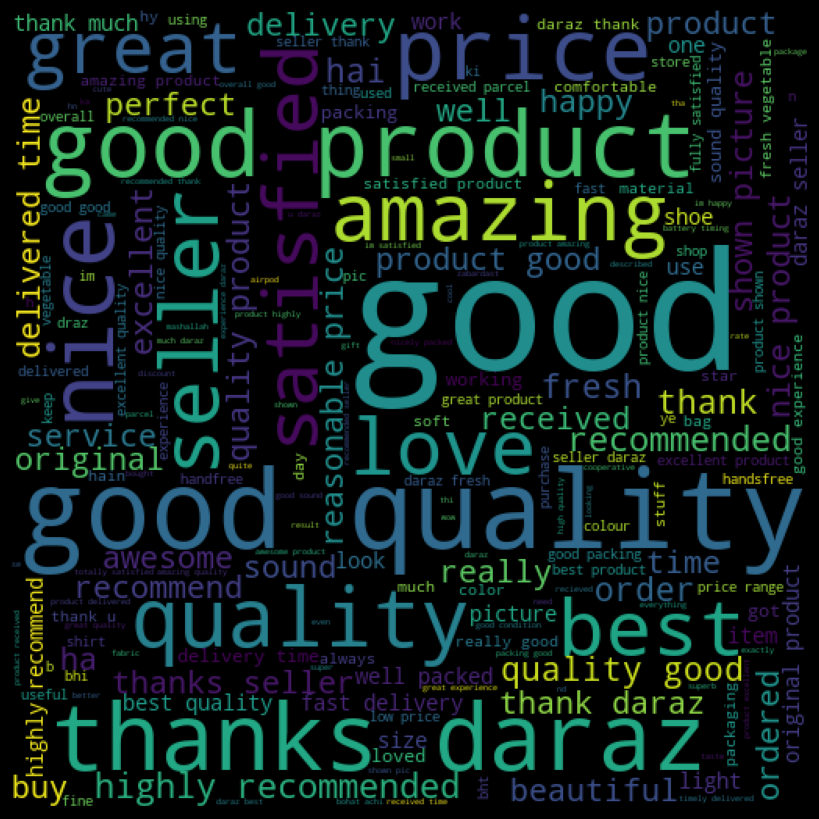

In [33]:
# Display the word cloud
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [34]:
# Join all reviews where Sentiments is negative
negative_reviews = ' '.join([' '.join(review) for review in df[df['Sentiments'] == 'negative']['Reviews']])

In [35]:
# Generate the word cloud
negative_wc = WordCloud(width = 512, height = 512).generate(negative_reviews)

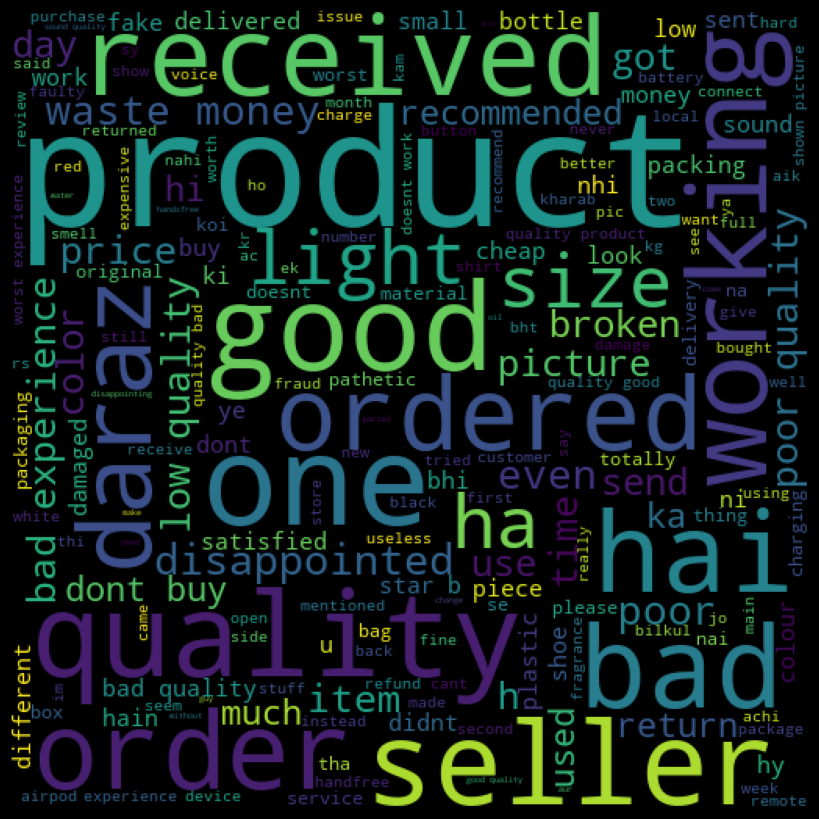

In [36]:
# Display the word cloud
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(negative_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

PREPARING DATA MODEL

In [37]:
X = df['Reviews']
y = df['Sentiments']

Join the words in each list into a single string

In [38]:
df['Reviews'] = df['Reviews'].apply(' '.join) 

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Reviews'])

In [40]:
tfidf_matrix.shape

(14529, 11534)

In [41]:
# Convert the matrix to an array and assign it to a new column in the dataframe
df['Reviews_TFIDF'] = tfidf_matrix.toarray().tolist()

In [42]:
df['Reviews_TFIDF'][0]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

encoding labels

In [43]:
Y= df['Sentiments'].apply(lambda x: 1 if x == 'positive' else 0)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, Y, test_size=0.1, random_state=42) 

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [49]:
# Train the MultinomialNB model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [50]:
# Predict and calculate accuracy for MultinomialNB
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'MultinomialNB Accuracy: {accuracy_nb}')

MultinomialNB Accuracy: 0.9229181004817619


In [51]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
confusion_matrix(y_test, y_pred)

array([[373,  47],
       [ 36, 997]], dtype=int64)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       420
           1       0.95      0.97      0.96      1033

    accuracy                           0.94      1453
   macro avg       0.93      0.93      0.93      1453
weighted avg       0.94      0.94      0.94      1453



In [53]:
# print the predictions
print(nb_model.predict(X_test))
# print the actual values
print(y_test.values)

[0 1 1 ... 1 1 1]
[0 1 1 ... 1 1 1]


In [54]:
#predict the sentiment of the review using the MultinomialNB model
def predict_sentiment(review):
    review = remove_special_characters_numbers(review)
    review = review.lower()
    review = remove_extra_whitespace(review)
    review = word_tokenize(review)
    review = remove_stopwords(review)
    review = ' '.join(review)
    review_tfidf = tfidf_vectorizer.transform([review])
    prediction = nb_model.predict(review_tfidf)
    return 'positive' if prediction[0] == 1 else 'negative'

In [55]:
# Test the function
predict_sentiment("The product is good")

'positive'

In [56]:
predict_sentiment("The product is bad")

'negative'

In [57]:
import numpy as np
def predict(english_text):
    if isinstance(english_text, str):
        english_text = [english_text]

    processed_text = []
    for text in english_text:
        text = remove_special_characters_numbers(text)
        text = text.lower()
        text = remove_extra_whitespace(text)
        tokens = word_tokenize(text)
        tokens = remove_stopwords(tokens)
        processed_text.append(" ".join(tokens))

    pred = tfidf_vectorizer.transform(processed_text).toarray()  # Convert to dense matrix

    results = []
    for i in range(pred.shape[0]):
        # Reshape the data to make it 2D
        instance = pred[i].reshape(1, -1)
        if np.squeeze(nb_model.predict(instance)) == 1:
            results.append(english_text[i] + ": Positive")
        else:
            results.append(english_text[i] + ": Negative")
    return results

In [58]:
def on_predict():
    review_text = review_entry.get()
    result = predict(review_text)
    messagebox.showinfo("Prediction Result", result[0])

# Create the Tkinter GUI
root = tk.Tk()
root.title("Sentiment Analysis")

tk.Label(root, text="Enter a review:").pack()

review_entry = tk.Entry(root, width=50)
review_entry.pack()

predict_button = tk.Button(root, text="Predict Sentiment", command=on_predict)
predict_button.pack()

root.mainloop()